# Visualisation

<table align="left">
    <tr>
    <td><a href="https://colab.research.google.com/github/airnandez/numpandas/blob/master/notebooks/visualisation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a></td>
    <td><a href="https://mybinder.org/v2/gh/airnandez/numpandas/master?filepath=notebooks%2Fvisualisation.ipynb">
  <img src="https://mybinder.org/badge_logo.svg" alt="Launch Binder"/>
</a></td>
  </tr>
</table>

*Author: Fabio Hernandez*

*Last updated: 2025-02-26*

*Location:* https://github.com/airnandez/numpandas

____ 
## Introduction

The data analysis process often requires visualising the data. The Python ecosystem offers several possibilities for data visualisation, such as [matplotlib](https://matplotlib.org), [bokeh](http://bokeh.pydata.org/en/latest/), [seaborn](https://seaborn.pydata.org), [altair](https://altair-viz.github.io), etc.

In [1]:
import pandas as pd

In [2]:
import os
import requests

def download(url: str, path: str):
    """Download file at url and save it locally at path."""
    
    with requests.get(url, stream=True) as resp:
        mode, data = 'wb', resp.content
        if 'text/plain' in resp.headers['Content-Type']:
            mode, data = 'wt', resp.text
        with open(path, mode) as f:
            f.write(data)

In [3]:
# Download the dataset if necessary to the directory 'data'
data_dir = 'data'
path = os.path.join('..', data_dir, 'european_union-2020.csv')

if not os.path.isfile(path):
    os.makedirs(os.path.join('..', data_dir), exist_ok=True)
    url = 'https://raw.githubusercontent.com/airnandez/numpandas/master/data/european_union-2020.csv'
    download(url, path)

In [4]:
df = pd.read_csv(path, index_col=1, sep=';', decimal=',')
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
BE,Belgium,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
BG,Bulgaria,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239


-------
<img src="https://matplotlib.org/stable/_static/logo_light.svg" align="left" alt="bokeh" width="30%" height="30%"/>

Reference: https://matplotlib.org

**pandas** is well integrated with matplotlib, so we can quickly produce graphics for exploration purposes:

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.dpi"] = 150

<Axes: xlabel='country_code'>

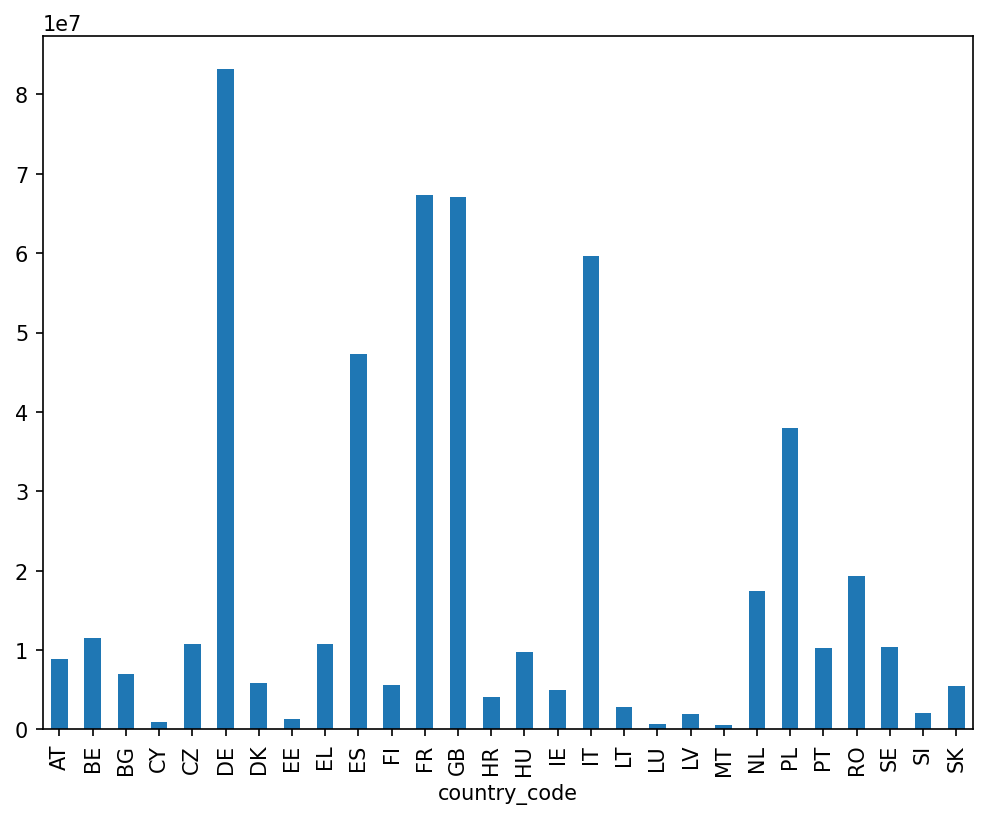

In [6]:
# The simplest possible way of plotting the contents of the 'population' column
df['population'].plot.bar()

The figure above is neither pretty nor very useful. Let's improve it a bit:

<Axes: title={'center': 'EU members population (2019)'}, xlabel='country'>

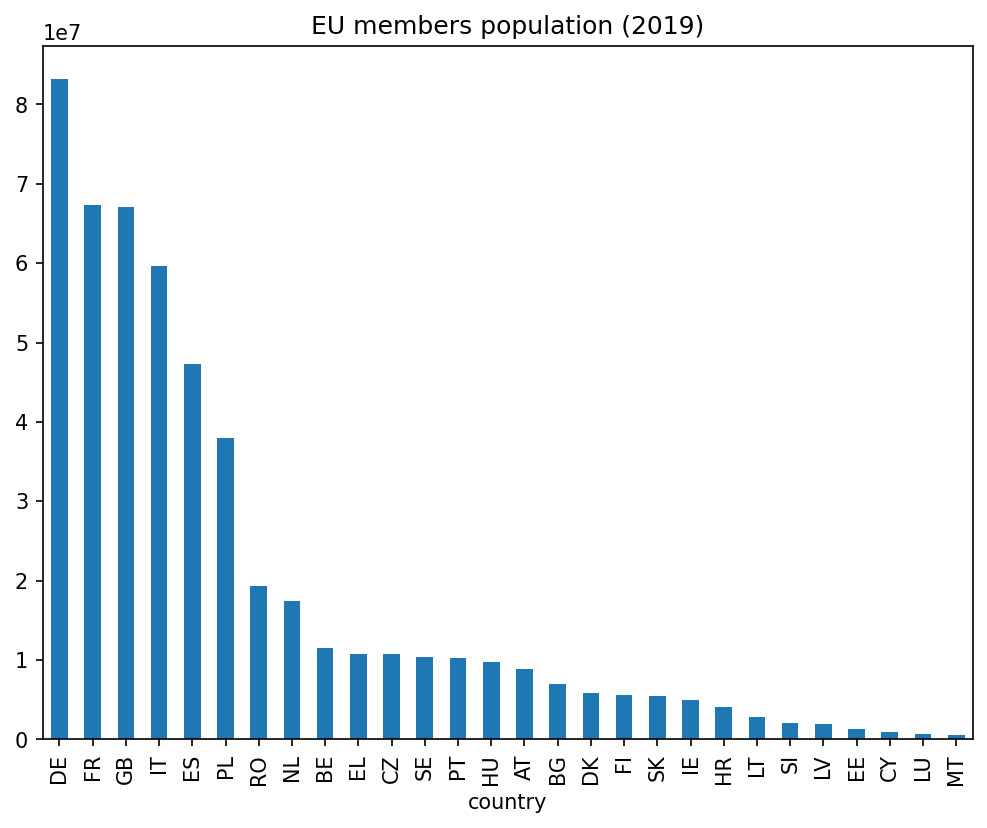

In [9]:
# Sort the values, add a title and a label for the horizontal axis
figure = df['population'].sort_values(ascending=False).plot.bar(title="EU members population (2019)")
figure.set_xlabel('country')
figure

----------
<img src="https://static.bokeh.org/logos/logotype.svg" align="left" alt="bokeh" width="15%" height="15%"/>

Reference: https://bokeh.pydata.org/en/latest/

In [10]:
import bokeh
import bokeh.plotting
bokeh.plotting.output_notebook()

Loading BokehJS ...

Select the data from the dataframe we want to plot:

In [11]:
# Select the population, in millions, per country
population = (df['population'] / 1_000_000).sort_values(ascending=False)
population.head(3)

country_code
DE    83.166711
FR    67.320216
GB    67.025542
Name: population, dtype: float64

In [12]:
fig1 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
)
fig1.vbar(x=population.index.values, top=population.values, width=0.8)
bokeh.plotting.show(fig1)

Improve the visual attributes of the figure:

In [15]:
fig2 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
    width = 800,
    height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8,
)

# Remove vertical grid lines
fig2.xgrid.grid_line_color = None

# Make toolbar autohide
fig2.toolbar.autohide = True

# Add vertical bars for each value
fig2.vbar(x=population.index.values, top=population.values, width=0.8, alpha=0.6)

# Display the figure
bokeh.plotting.show(fig2)

Bokeh allows for adding some interactivity to the figure:

In [16]:
# Populate the data source with the values we want to visualize
data = bokeh.models.ColumnDataSource({
    'country_code':       population.index.values,
    'country_name':       df.loc[population.index, 'country'],
    'country_population': population.values,
})

fig3 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
    width = 800,
    height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8
)

# Remove vertical grid lines
fig3.xgrid.grid_line_color = None

# Make toolbar autohide
fig3.toolbar.autohide = True

# Add vertical bars
fig3.vbar(x='country_code', top='country_population', source=data, width=0.8, alpha=0.6, color='LightSeaGreen')

# Add tooltips
fig3.add_tools(bokeh.models.HoverTool(
    tooltips = [
        ('country',    '@country_name'),
        ('population', '@country_population{0.2f} millions'),
    ],
    mode = 'mouse',
))

bokeh.plotting.show(fig3)

Another figure with additional customization: use the tooltips to present information not shown grapically

In [17]:
# Net number of individuals who immigrated to each EU country
net_immigration = (df['immigration'] - df['emigration']).sort_values(ascending=False)
net_immigration.head(3)

country_code
ES    454232
GB    312521
DE    310022
dtype: int64

In [18]:
# Populate the data source
data = bokeh.models.ColumnDataSource({
    'country_code':    net_immigration.index,
    'net_immigration': net_immigration.values,
    'pct_population':  net_immigration.abs() / df.loc[net_immigration.index, 'population'],
    'country_name':    df.loc[net_immigration.index, 'country'],
    'color':           ['LightSeaGreen' if v >= 0 else 'FireBrick' for v in net_immigration.values],
})

fig4 = bokeh.plotting.figure(
    title = 'Net immigration per EU member country',
    x_axis_label = 'country code',
    y_axis_label = 'individuals',
    x_range = net_immigration.index.values,
    width = 800,
    height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8
)
fig4.xgrid.grid_line_color = None
fig4.toolbar.autohide = True

# Add tooltips
fig4.add_tools(bokeh.models.HoverTool(
    tooltips = [
        ('country',                  '@country_name'),
        ('net immigrants',           '@net_immigration{0,0}'),
        ('percentage of population', '@pct_population{0.00%}'),
    ],
    mode = 'mouse',
))

# Use thousands separator for the Y axis labels
fig4.yaxis.formatter = bokeh.models.formatters.NumeralTickFormatter(format="0,0")

# Add a vertical bar per country: the hight of the bar is the value in the 'net_immigration' series
fig4.vbar(x='country_code', top='net_immigration', source=data, color='color', width=0.8, alpha=0.6)

bokeh.plotting.show(fig4)